In [212]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [211]:
import pandas as pd 
import matplotlib.pyplot as plt
import streamlit as st  
import numpy as np 
import seaborn as sns
import plotly.express as px





In [122]:
# connectarme a los datos coffe_sales.csv import 
df = pd.read_csv('coffe_sales.csv')
df.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000


In [123]:
# identificar las columnas que tiene el dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   object 
 7   Weekdaysort  3547 non-null   int64  
 8   Monthsort    3547 non-null   int64  
 9   Date         3547 non-null   object 
 10  Time         3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB


In [47]:
df.dtypes 


Month_name    object
dtype: object

In [124]:
print(df.columns.tolist())
df.describe()

['hour_of_day', 'cash_type', 'money', 'coffee_name', 'Time_of_Day', 'Weekday', 'Month_name', 'Weekdaysort', 'Monthsort', 'Date', 'Time']


,hour_of_day,money,Weekdaysort,Monthsort
count,3547.000000,3547.000000,3547.000000,3547.000000
mean,14.185791,31.645216,3.845785,6.453905
std,4.234010,4.877754,1.971501,3.500754
min,6.000000,18.120000,1.000000,1.000000
25%,10.000000,27.920000,2.000000,3.000000
50%,14.000000,32.820000,4.000000,7.000000
75%,18.000000,35.760000,6.000000,10.000000
max,22.000000,38.700000,7.000000,12.000000


In [8]:
df.shape

(3547, 11)

In [125]:
df.sample(10,random_state=42)

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
299,19,card,32.82,Americano with Milk,Night,Tue,Apr,2,4,2024-04-23,19:43:26.234000
2550,21,card,35.76,Latte,Night,Wed,Dec,3,12,2024-12-25,21:57:30.270000
3079,17,card,35.76,Cappuccino,Night,Wed,Feb,3,2,2025-02-19,17:34:49.096000
2342,14,card,35.76,Cocoa,Afternoon,Sat,Nov,6,11,2024-11-30,14:16:52.019000
1211,15,card,18.12,Espresso,Afternoon,Fri,Aug,5,8,2024-08-16,15:18:51.737000
1729,8,card,35.76,Latte,Morning,Mon,Oct,1,10,2024-10-07,08:33:36.423000
1583,18,card,23.02,Americano,Night,Tue,Sep,2,9,2024-09-24,18:43:02.935000
2131,18,card,35.76,Cappuccino,Night,Tue,Nov,2,11,2024-11-05,18:52:56.274000
2113,16,card,25.96,Americano,Afternoon,Sun,Nov,7,11,2024-11-03,16:21:46.055000
3080,17,card,30.86,Americano with Milk,Night,Wed,Feb,3,2,2025-02-19,17:57:52.035000


In [126]:

df.tail(10)


,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
3537,15,card,21.06,Espresso,Afternoon,Sat,Mar,6,3,2025-03-22,15:57:58.183000
3538,16,card,35.76,Latte,Afternoon,Sat,Mar,6,3,2025-03-22,16:26:59.766000
3539,17,card,30.86,Americano with Milk,Night,Sat,Mar,6,3,2025-03-22,17:53:35.942000
3540,19,card,30.86,Americano with Milk,Night,Sat,Mar,6,3,2025-03-22,19:16:52.727000
3541,10,card,35.76,Latte,Morning,Sun,Mar,7,3,2025-03-23,10:07:11.278000
3542,10,card,35.76,Cappuccino,Morning,Sun,Mar,7,3,2025-03-23,10:34:54.894000
3543,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,14:43:37.362000
3544,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,14:44:16.864000
3545,15,card,25.96,Americano,Afternoon,Sun,Mar,7,3,2025-03-23,15:47:28.723000
3546,18,card,35.76,Latte,Night,Sun,Mar,7,3,2025-03-23,18:11:38.635000


In [127]:
# mantenerlas todas o no 
print(df.columns.tolist())
df.head()

['hour_of_day', 'cash_type', 'money', 'coffee_name', 'Time_of_Day', 'Weekday', 'Month_name', 'Weekdaysort', 'Monthsort', 'Date', 'Time']


,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000


In [129]:
# values counts de coffe name 
df['coffee_name'].value_counts()

coffee_name
Americano with Milk    809
Latte                  757
Americano              564
Cappuccino             486
Cortado                287
Hot Chocolate          276
Cocoa                  239
Espresso               129
Name: count, dtype: int64

In [151]:
df['Money'].value_counts()

Money
35.76    1014
32.82     490
25.96     459
30.86     389
27.92     334
37.72     273
23.02     208
38.70     128
28.90      93
21.06      59
33.80      51
18.12      36
24.00      13
Name: count, dtype: int64

In [130]:
df['hour_of_day'].value_counts()

hour_of_day
10    328
11    283
16    278
9     242
12    241
17    237
15    236
8     235
19    229
13    225
14    225
18    218
21    195
20    169
22    113
7      88
6       5
Name: count, dtype: int64

In [131]:
# analizar cada columna 



df['Month_name'].value_counts()


Month_name
Mar    494
Oct    426
Feb    423
Sep    344
Aug    272
Dec    259
Nov    259
May    241
Jul    237
Jun    223
Jan    201
Apr    168
Name: count, dtype: int64

In [132]:
df['Weekday'].value_counts()

Weekday
Tue    572
Mon    544
Fri    532
Thu    510
Wed    500
Sat    470
Sun    419
Name: count, dtype: int64

In [133]:
df['Time_of_Day'].value_counts()

Time_of_Day
Afternoon    1205
Morning      1181
Night        1161
Name: count, dtype: int64

In [134]:
df['cash_type'].value_counts()

cash_type
card    3547
Name: count, dtype: int64

In [135]:
# renombrar columnas 
df = df.rename(columns={
    'hour_of_day': 'Hour_of_Day',
    'cash_type': 'Cash_Type',
    'money': 'Money',
    'coffee_name': 'Coffee_Name'
})
print(df.columns.tolist())


['Hour_of_Day', 'Cash_Type', 'Money', 'Coffee_Name', 'Time_of_Day', 'Weekday', 'Month_name', 'Weekdaysort', 'Monthsort', 'Date', 'Time']


In [136]:
# rewrite the value inside the columns 'Weekday' to full English names 
df['Weekday'] = df['Weekday'].replace({
    'Mon': 'Monday',
    'Tue': 'Tuesday',
    'Wed': 'Wednesday',
    'Thu': 'Thursday',
    'Fri': 'Friday',
    'Sat': 'Saturday',
    'Sun': 'Sunday'
}) 
print(df['Weekday'].value_counts())

Weekday
Tuesday      572
Monday       544
Friday       532
Thursday     510
Wednesday    500
Saturday     470
Sunday       419
Name: count, dtype: int64


In [137]:
# rewrite the monthday in full 
df['Month_name'] = df['Month_name'].replace({
    'Jan': 'January',
    'Feb': 'February',
    'Mar': 'March',
    'Apr': 'April',
    'May': 'May',
    'Jun': 'June',
    'Jul': 'July',
    'Aug': 'August',
    'Sep': 'September',
    'Oct': 'October',
    'Nov': 'November',
    'Dec': 'December'
})
print(df['Month_name'].value_counts())
df.head()

Month_name
March        494
October      426
February     423
September    344
August       272
December     259
November     259
May          241
July         237
June         223
January      201
April        168
Name: count, dtype: int64


,Hour_of_Day,Cash_Type,Money,Coffee_Name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Friday,March,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Friday,March,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Friday,March,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Friday,March,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Friday,March,5,3,2024-03-01,13:48:14.626000


In [138]:
   # valores nulos y duplicados
df.isnull().sum()

Hour_of_Day    0
Cash_Type      0
Money          0
Coffee_Name    0
Time_of_Day    0
Weekday        0
Month_name     0
Weekdaysort    0
Monthsort      0
Date           0
Time           0
dtype: int64

In [139]:
df.isnull().mean() * 100

Hour_of_Day    0.0
Cash_Type      0.0
Money          0.0
Coffee_Name    0.0
Time_of_Day    0.0
Weekday        0.0
Month_name     0.0
Weekdaysort    0.0
Monthsort      0.0
Date           0.0
Time           0.0
dtype: float64

In [140]:
df.duplicated().sum() 



np.int64(0)

In [142]:
cafe_mas_vendido = df['Coffee_Name'].value_counts().idxmax() 

print(f"El tipo de café más vendido es: {cafe_mas_vendido}")

El tipo de café más vendido es: Americano with Milk


In [144]:
total_ventas = len(df)
ventas_americano = df[df['Coffee_Name'] == 'Americano'].shape[0]
porcentaje_americano = (ventas_americano / total_ventas) * 100
print(f"El porcentaje de ventas de café Americano es: {porcentaje_americano:.2f}%")

El porcentaje de ventas de café Americano es: 15.90%


In [145]:

# Calcular el porcentaje de cada tipo de café
porcentajes_cafe = df['Coffee_Name'].value_counts(normalize=True) * 100
df['coffee_percentage'] = df['Coffee_Name'].map(porcentajes_cafe)
print(df[['Coffee_Name', 'coffee_percentage']].head())



     Coffee_Name  coffee_percentage
0          Latte          21.341979
1  Hot Chocolate           7.781224
2  Hot Chocolate           7.781224
3      Americano          15.900761
4          Latte          21.341979


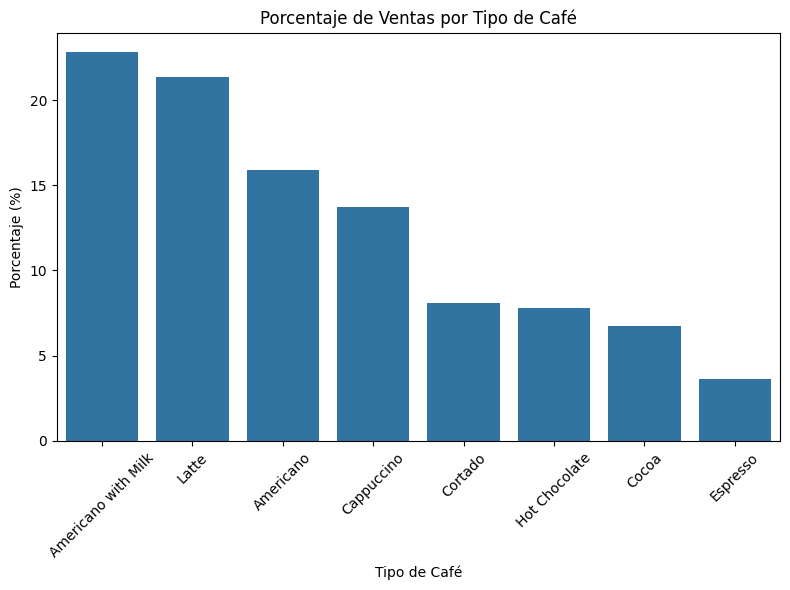

In [204]:
# Mostrar el porcentaje de cada tipo de café en un gráfico

porcentajes_cafe = df['Coffee_Name'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
sns.barplot(x=porcentajes_cafe.index, y=porcentajes_cafe.values)
plt.title('Porcentaje de Ventas por Tipo de Café')
plt.xlabel('Tipo de Café')
plt.ylabel('Porcentaje (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [147]:
#  ¿La venta fue en fin de semana?
df['is_weekend'] = df['Weekday'].isin(['Saturday', 'Sunday'])
print(df[['Weekday', 'is_weekend']].head())

  Weekday  is_weekend
0  Friday       False
1  Friday       False
2  Friday       False
3  Friday       False
4  Friday       False


In [148]:
#veer el dia de semana que mas se vende cafe 
df['is_Weekday'] = df['Weekday'].isin(['Mon','Tue','Wed','Thur','Fri'])
print(df['Weekday'].head())

0    Friday
1    Friday
2    Friday
3    Friday
4    Friday
Name: Weekday, dtype: object


In [152]:
# Seleccionar variables numéricas relevantes para el análisis
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Columnas numéricas relevantes para el análisis:", numeric_cols)


Columnas numéricas relevantes para el análisis: ['Hour_of_Day', 'Money', 'Weekdaysort', 'Monthsort', 'coffee_percentage']


In [153]:
# Calcular matriz de correlación 
correlation_matrix = df[numeric_cols].corr()
print("Matriz de correlación:\n", correlation_matrix)

Matriz de correlación:
                    Hour_of_Day     Money  Weekdaysort  Monthsort  \
Hour_of_Day           1.000000  0.202748    -0.002614   0.008293   
Money                 0.202748  1.000000    -0.017264  -0.050043   
Weekdaysort          -0.002614 -0.017264     1.000000   0.044141   
Monthsort             0.008293 -0.050043     0.044141   1.000000   
coffee_percentage    -0.052353  0.160035    -0.040305   0.014634   

                   coffee_percentage  
Hour_of_Day                -0.052353  
Money                       0.160035  
Weekdaysort                -0.040305  
Monthsort                   0.014634  
coffee_percentage           1.000000  


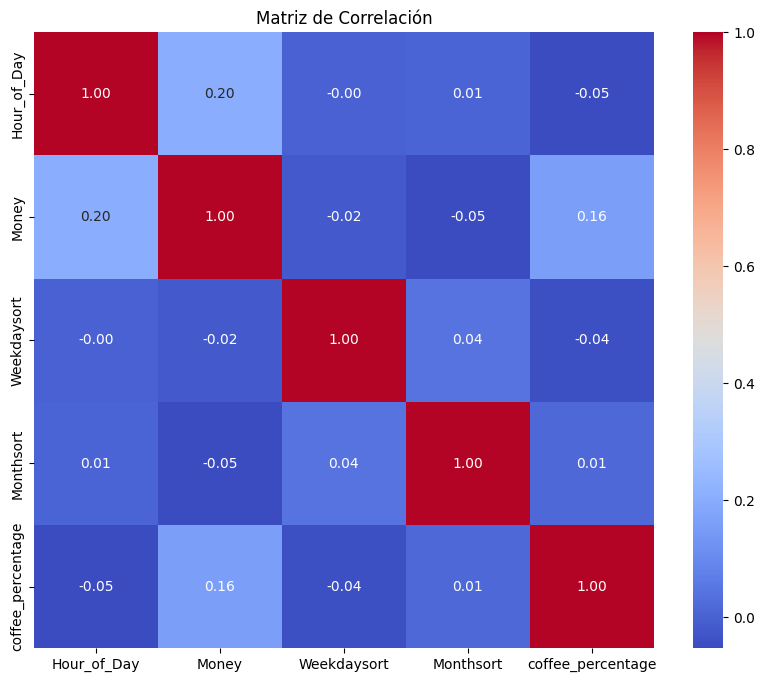

In [172]:
# Visualización de la matriz de correlación con heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()
# Análisis de ventas por día de la semana con gráfico de pastel
print("=" * 80)
    # Comprobar si las columnas necesarias existen
if 'Weekday' not in df.columns or 'Money' not in df.columns or 'Weekdaysort' not in df.columns:
 print("Error: El CSV no contiene las columnas 'Weekday', 'Money', y 'Weekdaysort'.") 
 

In [181]:
df.head()

,Hour_of_Day,Cash_Type,Money,Coffee_Name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time,coffee_percentage,is_weekend,is_Weekday
0,10,card,38.7,Latte,Morning,Friday,March,5,3,2024-03-01,10:15:50.520000,21.341979,False,True
1,12,card,38.7,Hot Chocolate,Afternoon,Friday,March,5,3,2024-03-01,12:19:22.539000,7.781224,False,True
2,12,card,38.7,Hot Chocolate,Afternoon,Friday,March,5,3,2024-03-01,12:20:18.089000,7.781224,False,True
3,13,card,28.9,Americano,Afternoon,Friday,March,5,3,2024-03-01,13:46:33.006000,15.900761,False,True
4,13,card,38.7,Latte,Afternoon,Friday,March,5,3,2024-03-01,13:48:14.626000,21.341979,False,True


In [180]:
#cambiar los valores de la columna is_weekday de false a true
df['is_Weekday'] = True
print(df['is_Weekday'].value_counts())

is_Weekday
True    3547
Name: count, dtype: int64


In [206]:
df = df.rename(columns={
 'coffee_percentage':'Coffe_Percentage'

})
print(df.columns.tolist())


['Hour_of_Day', 'Cash_Type', 'Money', 'Coffee_Name', 'Time_of_Day', 'Weekday', 'Month_name', 'Weekdaysort', 'Monthsort', 'Date', 'Time', 'Coffe_Percentage', 'is_weekend', 'is_Weekday']


In [ ]:
df = df.rename

Análisis de ventas por día de la semana

Distribución de ventas por día:
  Weekday    Money
   Monday 17363.10
  Tuesday 18168.38
Wednesday 15750.46
 Thursday 16091.40
   Friday 16802.66
 Saturday 14733.52
   Sunday 13336.06


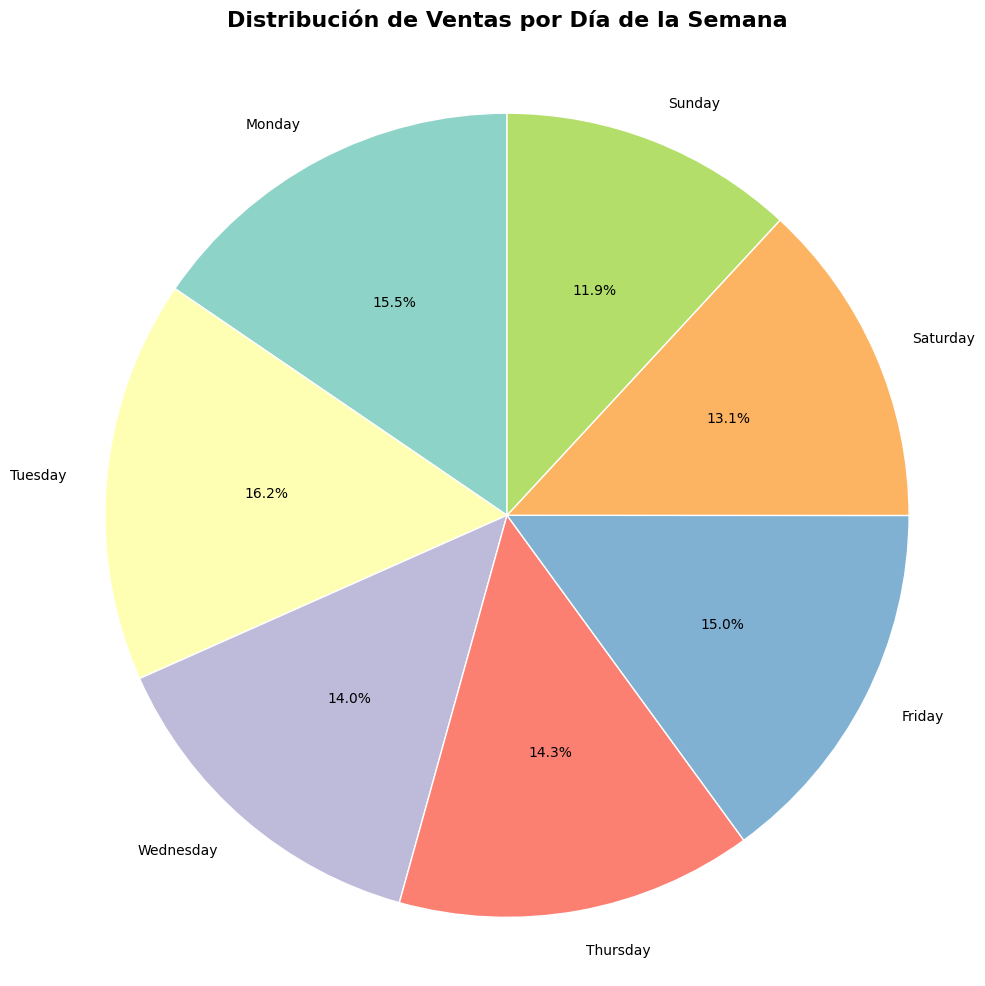

In [162]:
   

 # 1. Análisis de ventas por día
   
print("Análisis de ventas por día de la semana")
print("=" * 80)

 # Comprobar si las columnas necesarias existen
if 'Weekday' not in df.columns or 'Money' not in df.columns or 'Weekdaysort' not in df.columns:
 print("Error: El CSV no contiene las columnas 'Weekday', 'Money', y 'Weekdaysort'.")
else:
        # 2. Contar ventas (agregando 'money') por 'Weekday'
        # Agrupamos por día y por el clasificador para mantener el orden
        sales_by_day = df.groupby(['Weekday', 'Weekdaysort'])['Money'].sum()
        
        # Ordenamos por la columna 'Weekdaysort'
        sales_by_day = sales_by_day.reset_index().sort_values('Weekdaysort')
        
        print("\nDistribución de ventas por día:")
        # Imprimimos solo el día y el dinero, sin el índice de sort
        print(sales_by_day[['Weekday', 'Money']].to_string(index=False))

        # 3. Visualización con gráfico de pastel (adaptado)
        plt.figure(figsize=(10, 10)) # Ajustado a un tamaño más cuadrado para el pastel
        colors = sns.color_palette('Set3', len(sales_by_day))
        
        # Usamos los valores de 'money' y las etiquetas de 'Weekday'
        plt.pie(sales_by_day['Money'], 
                labels=sales_by_day['Weekday'], 
                autopct='%1.1f%%', 
                startangle=90, 
                colors=colors,
                wedgeprops={'edgecolor': 'white'}, # Añadir un borde blanco
                textprops={'fontsize': 10})
        
        # Título adaptado
        plt.title('Distribución de Ventas por Día de la Semana', fontsize=16, fontweight='bold', pad=20)
        plt.axis('equal') # Asegura que el pastel sea un círculo
        plt.tight_layout()

Ventas por tipo de café y mes:
   Coffee_Name Month_name  Ventas
0    Americano      April      33
1    Americano     August      37
2    Americano   December      27
3    Americano   February     117
4    Americano    January      25
..         ...        ...     ...
91       Latte      March      92
92       Latte        May      50
93       Latte   November      68
94       Latte    October     120
95       Latte  September      94

[96 rows x 3 columns]
Café más vendido por mes:
   Month_name          Coffee_Name  Ventas
12      April  Americano with Milk      38
13     August  Americano with Milk      72
14   December  Americano with Milk      57
3    February            Americano     117
16    January  Americano with Milk      52
17       July  Americano with Milk      65
18       June  Americano with Milk      66
7       March            Americano     134
20        May  Americano with Milk      54
93   November                Latte      68
94    October                Latte     

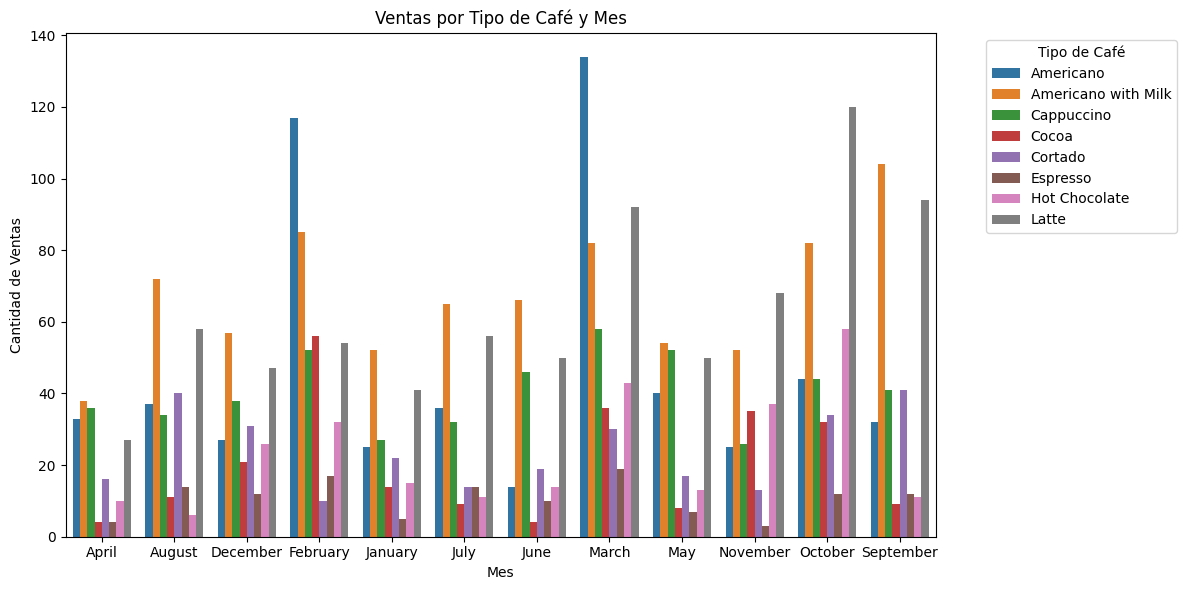

In [200]:
#analisis por tipo de cafe mas vendido durante el mes y que mes se vende mas ca

print("=" * 80)

# Agrupar por tipo de café y mes, contando ventas
ventas_por_cafe_mes = df.groupby(['Coffee_Name', 'Month_name']).size().reset_index(name='Ventas')

print("Ventas por tipo de café y mes:")
print(ventas_por_cafe_mes)

# Encontrar el café más vendido en cada mes
cafe_mas_vendido_por_mes = ventas_por_cafe_mes.loc[ventas_por_cafe_mes.groupby('Month_name')['Ventas'].idxmax()]
print("Café más vendido por mes:")
print(cafe_mas_vendido_por_mes[['Month_name', 'Coffee_Name', 'Ventas']])

# Encontrar el mes con más ventas totales
ventas_por_mes = df['Month_name'].value_counts().reset_index()
ventas_por_mes.columns = ['Month_name', 'Total_Ventas']
print("Mes con más ventas totales:")
print(ventas_por_mes)

# Visualización: gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=ventas_por_cafe_mes, x='Month_name', y='Ventas', hue='Coffee_Name')
plt.title('Ventas por Tipo de Café y Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Ventas')
plt.legend(title='Tipo de Café', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()





Ventas por tipo de café y día de la semana:
            Coffee_Name    Weekday  Ventas
0             Americano     Friday     105
1             Americano     Monday      93
2             Americano   Saturday      69
3             Americano     Sunday      46
4             Americano   Thursday      82
5             Americano    Tuesday      81
6             Americano  Wednesday      88
7   Americano with Milk     Friday     103
8   Americano with Milk     Monday     128
9   Americano with Milk   Saturday     120
10  Americano with Milk     Sunday      99
11  Americano with Milk   Thursday     103
12  Americano with Milk    Tuesday     143
13  Americano with Milk  Wednesday     113
14           Cappuccino     Friday      62
15           Cappuccino     Monday      71
16           Cappuccino   Saturday      69
17           Cappuccino     Sunday      70
18           Cappuccino   Thursday      77
19           Cappuccino    Tuesday      63
20           Cappuccino  Wednesday      74
21        

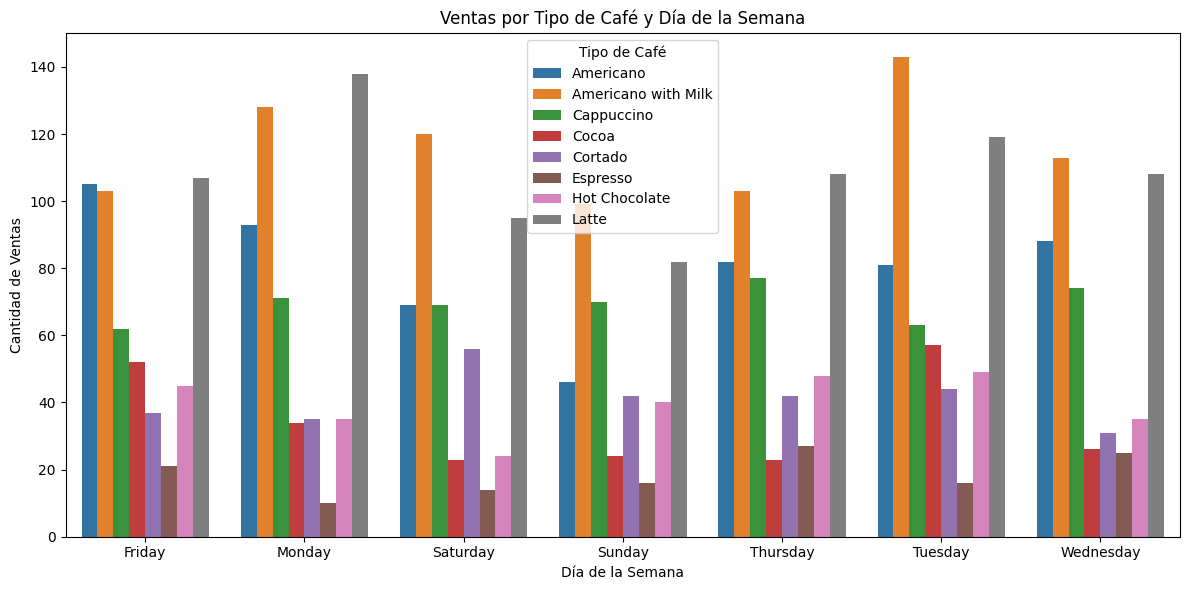

In [192]:
# Análisis por tipo de cafe mas vendido durante el dia
print("=" * 80)
# Agrupar por tipo de café y día de la semana, contando ventas
ventas_por_cafe_dia = df.groupby(['Coffee_Name', 'Weekday']).size().reset_index(name='Ventas')

print("Ventas por tipo de café y día de la semana:")
print(ventas_por_cafe_dia)

# Visualización: gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=ventas_por_cafe_dia, x='Weekday', y='Ventas', hue='Coffee_Name')
plt.title('Ventas por Tipo de Café y Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Cantidad de Ventas')
plt.legend(title='Tipo de Café')
plt.tight_layout()
plt.show() 

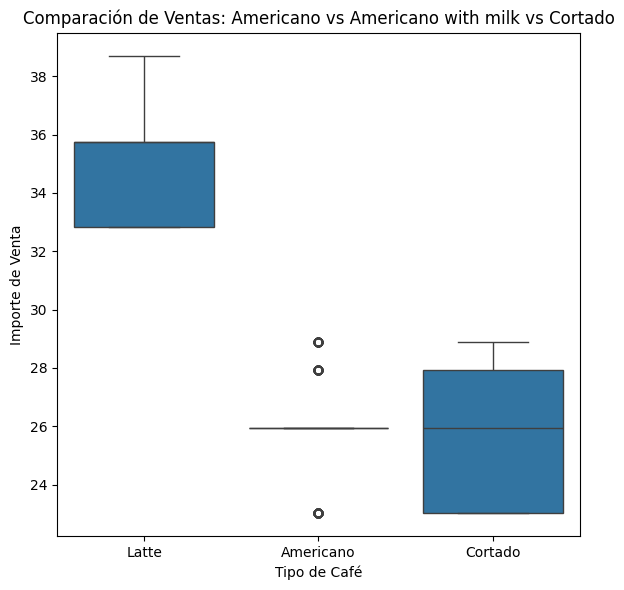

In [194]:
# Comparar cofe type Americano vs Americano with milk vs cortado vs latte
print("=" * 80)

# Filtrar los tipos de café deseados
tipos_cafe = ['Americano', 'Americano with milk', 'Cortado','Latte']
df_comparacion = df[df['Coffee_Name'].isin(tipos_cafe)]

# Boxplot comparativo del importe de venta por tipo de café
plt.figure(figsize=(6, 6))
sns.boxplot(data=df_comparacion, x='Coffee_Name', y='Money')
plt.title('Comparación de Ventas: Americano vs Americano with milk vs Cortado')
plt.xlabel('Tipo de Café')
plt.ylabel('Importe de Venta')
plt.tight_layout()
plt.show()


Café más vendido por día de la semana:
      Weekday          Coffee_Name  Ventas
49     Friday                Latte     107
50     Monday                Latte     138
9    Saturday  Americano with Milk     120
10     Sunday  Americano with Milk      99
53   Thursday                Latte     108
12    Tuesday  Americano with Milk     143
13  Wednesday  Americano with Milk     113


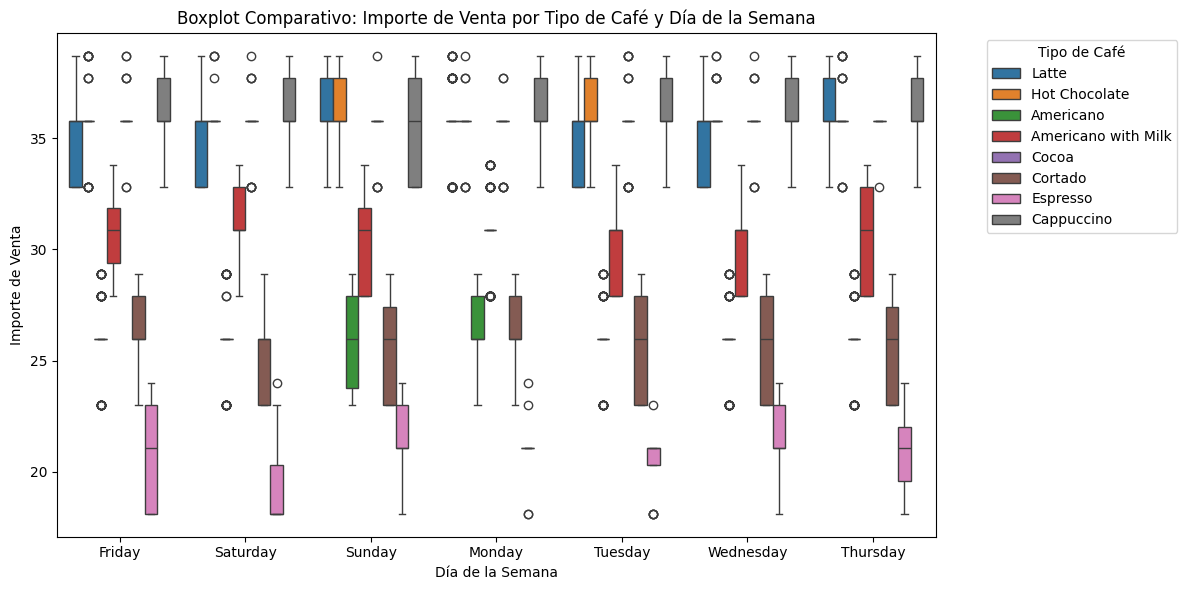

In [193]:
# Café más vendido durante la semana y boxplot comparativo

print("=" * 80)

# Agrupar por tipo de café y día de la semana, contando ventas
ventas_por_cafe_dia = df.groupby(['Coffee_Name', 'Weekday']).size().reset_index(name='Ventas')

# Encontrar el café más vendido en cada día de la semana
cafe_mas_vendido_por_dia = ventas_por_cafe_dia.loc[ventas_por_cafe_dia.groupby('Weekday')['Ventas'].idxmax()]
print("Café más vendido por día de la semana:")
print(cafe_mas_vendido_por_dia[['Weekday', 'Coffee_Name', 'Ventas']])

# Boxplot comparativo del importe de venta por tipo de café y día de la semana
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Weekday', y='Money', hue='Coffee_Name')
plt.title('Boxplot Comparativo: Importe de Venta por Tipo de Café y Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Importe de Venta')
plt.legend(title='Tipo de Café', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [201]:
# Café más vendido en todo el año

cafe_mas_vendido_ano = df['Coffee_Name'].value_counts().idxmax()
ventas_cafe_mas_vendido = df['Coffee_Name'].value_counts().max()

print(f"El café más vendido en todo el año es: {cafe_mas_vendido_ano} con {ventas_cafe_mas_vendido} ventas.")

El café más vendido en todo el año es: Americano with Milk con 809 ventas.


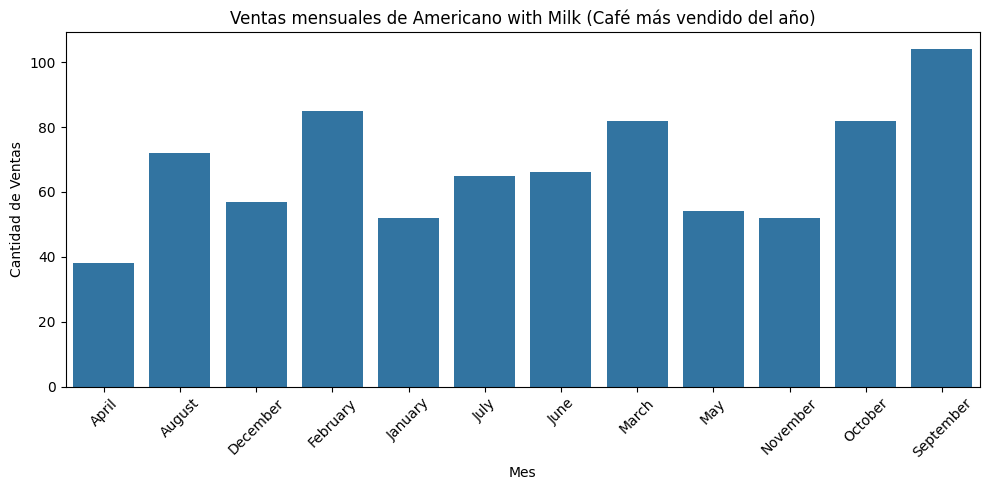

In [202]:
# Gráfico del café más vendido en todo el año

cafe_mas_vendido_ano = df['Coffee_Name'].value_counts().idxmax()

# Filtrar solo las ventas del café más vendido
df_cafe_mas_vendido = df[df['Coffee_Name'] == cafe_mas_vendido_ano]

# Agrupar por mes y contar ventas
ventas_por_mes = df_cafe_mas_vendido['Month_name'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.barplot(x=ventas_por_mes.index, y=ventas_por_mes.values)
plt.title(f'Ventas mensuales de {cafe_mas_vendido_ano} (Café más vendido del año)')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Ventas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

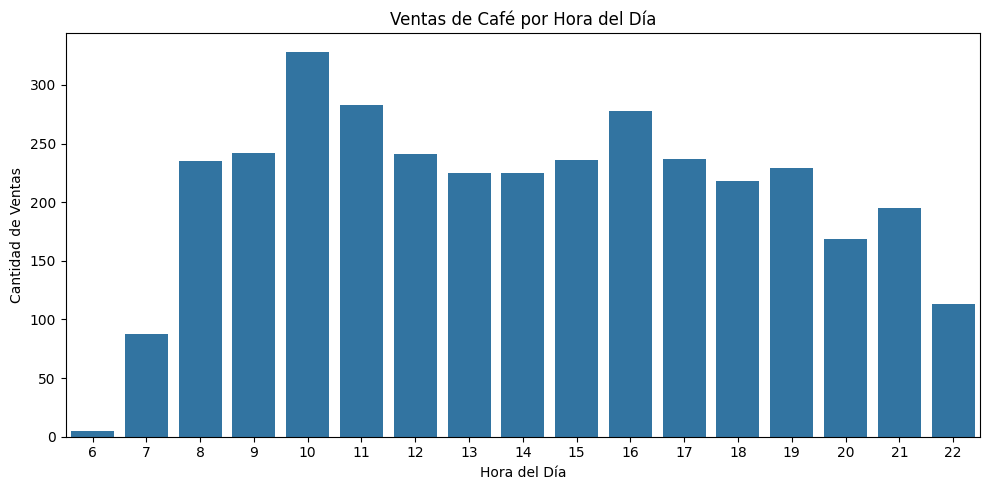

In [203]:
#hora del dia dodme mas se vende caffee
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Hour_of_Day', order=sorted(df['Hour_of_Day'].unique()))
plt.title('Ventas de Café por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Cantidad de Ventas')
plt.tight_layout()
plt.show()

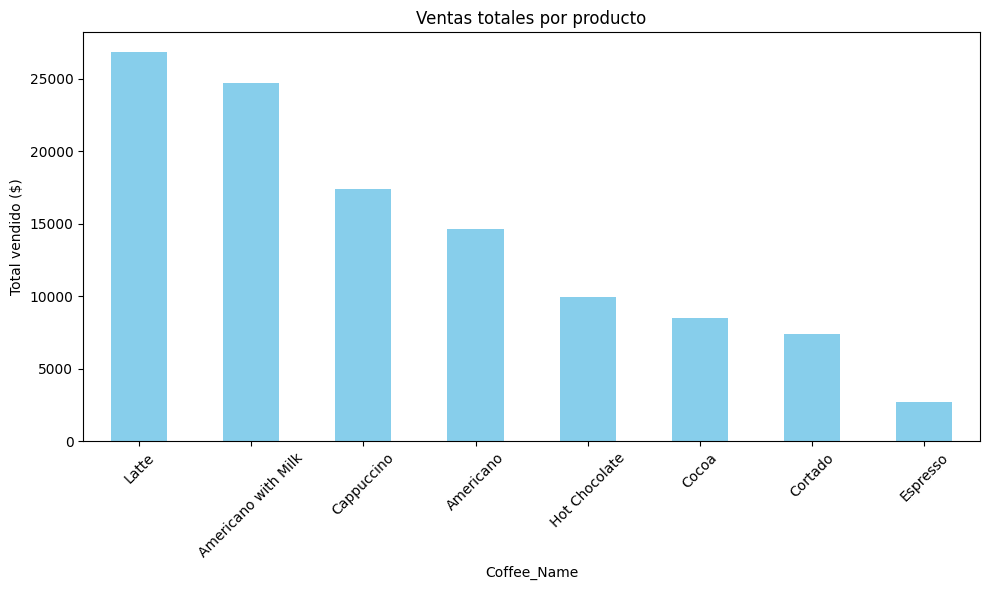

In [213]:


# Agrupar ventas por producto
ventas_por_producto = df.groupby('Coffee_Name')['Money'].sum().sort_values(ascending=False)

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
ventas_por_producto.plot(kind='bar', color='skyblue')
plt.title('Ventas totales por producto')
plt.ylabel('Total vendido ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


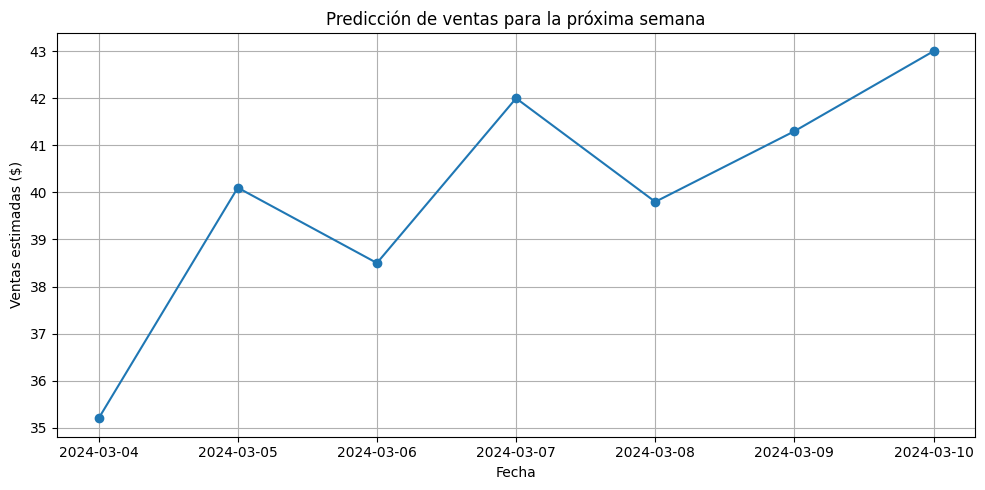

In [ ]:
# Supongamos que tienes un DataFrame con fechas y predicciones
predicciones = pd.DataFrame({
    'date': pd.date_range(start='2024-03-04', periods=7),
    'predicted_sales': [35.2, 40.1, 38.5, 42.0, 39.8, 41.3, 43.0]
})

# Gráfico de línea
plt.figure(figsize=(10, 5))
plt.plot(predicciones['date'], predicciones['predicted_sales'], marker='o', linestyle='-')
plt.title('Predicción de ventas para la próxima semana')
plt.xlabel('Fecha')
plt.ylabel('Ventas estimadas ($)')
plt.grid(True)
plt.tight_layout() 
plt.show()


In [225]:
# Exportar dataset limpio
output_path = 'Coffe_sales_clean.csv'
df.to_csv(output_path, index=False)